In [1]:
import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
from nltk.classify import DecisionTreeClassifier
from nltk.classify import MaxentClassifier
from nltk import word_tokenize
import numpy as np


from sklearn import cross_validation

E:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import random

In [30]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
import matplotlib.pyplot as plt
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [4]:
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [5]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
non_stopwords = [word for word in all_words if word not in stopwords.words("english")]
word_features = list(non_stopwords)[:3000]

print(len(non_stopwords))

group_words = nltk.pos_tag(non_stopwords, tagset='universal')
word_tag_fd = nltk.FreqDist(group_words)
posed_words = [wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'ADJ' or wt[1] == "ADV"]
word_features2 = list(posed_words)[:3000]
print(len(posed_words))

def document_features(document):
    document_words = set(document)
    features = {}
    for word in non_stopwords:
        features['contains({})'.format(word)] = (word in document_words)
    return features

def document_features_pos(document):
    document_words = set(document)
    features = {}
    for word in posed_words:
        features['contains({})'.format(word)] = (word in document_words)
    return features

39617
10222


In [5]:
len(word_features)
print(group_words[0])

('plot', 'NOUN')


In [21]:
#print(x)

In [22]:
#word_tag_fd = nltk.FreqDist(test)
#x = [wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'ADJ']

In [6]:
print(document_features(movie_reviews.words('pos/cv957_8737.txt')))

{'contains(accident)': False, 'contains(fuck)': False, 'contains(bad)': False, 'contains(even)': False, 'contains(harder)': False, 'contains(write)': False, 'contains(generally)': False, 'contains(break)': False, 'contains(good)': False, 'contains(correctly)': False, 'contains(pretty)': False, 'contains(neat)': False, 'contains(terribly)': False, 'contains(well)': True, 'contains(main)': False, 'contains(simply)': False, 'contains(normal)': False, 'contains(fantasy)': False, 'contains(dreams)': False, 'contains(back)': False, 'contains(dead)': False, 'contains(strange)': False, 'contains(looooot)': False, 'contains(personally)': False, 'contains(unravel)': False, 'contains(biggest)': False, 'contains(obviously)': False, 'contains(big)': False, 'contains(secret)': False, 'contains(completely)': False, 'contains(final)': False, 'contains(meantime)': False, 'contains(really)': False, 'contains(sad)': False, 'contains(actually)': True, 'contains(half)': False, 'contains(strangeness)': Fals

In [7]:
featuresets = [(document_features(d), c) for (d,c) in documents]
print(len(featuresets))

2000


In [8]:
featuresetspos = [(document_features_pos(d), c) for (d,c) in documents]

In [21]:
#Using 10-fold crossvalidation for the training and test set
training_set = featuresets
cv = cross_validation.KFold(len(training_set), n_folds=10, shuffle=False, random_state=None)
total = 0
for traincv, testcv in cv:
    classifier = nltk.NaiveBayesClassifier.train(training_set[traincv[0]:traincv[len(traincv)-1]])
    print('accuracy:', nltk.classify.accuracy(classifier, training_set[testcv[0]:testcv[len(testcv)-1]]))
    total +=nltk.classify.accuracy(classifier, training_set[testcv[0]:testcv[len(testcv)-1]])
average = total / 10
print('Crossvalidation accuracy:', average)

accuracy: 0.8442211055276382
accuracy: 0.964824120603015
accuracy: 0.9698492462311558
accuracy: 0.9698492462311558
accuracy: 0.9748743718592965
accuracy: 0.9547738693467337
accuracy: 0.9698492462311558
accuracy: 0.9396984924623115
accuracy: 0.9346733668341709
accuracy: 0.8090452261306532


TypeError: must be str, not float

In [25]:
#Using a 75/25 split for the training set and test set without crossvalidation
train_set_normal, test_set_normal = featuresets[:1500], featuresets[1500:]
classifier = nltk.NaiveBayesClassifier.train(train_set_normal)
Naive_Accuracy = (nltk.classify.accuracy(classifier, test_set_pos))*100
print(nltk.classify.accuracy(classifier, test_set_normal))

0.778


In [11]:
classifier.show_most_informative_features(10)

Most Informative Features
         contains(sucks) = True              neg : pos    =     12.8 : 1.0
     contains(insulting) = True              neg : pos    =     12.8 : 1.0
       contains(miscast) = True              neg : pos    =     12.2 : 1.0
   contains(outstanding) = True              pos : neg    =     11.7 : 1.0
     contains(ludicrous) = True              neg : pos    =     11.4 : 1.0
          contains(slip) = True              pos : neg    =     11.0 : 1.0
        contains(hatred) = True              pos : neg    =     10.3 : 1.0
        contains(norton) = True              pos : neg    =     10.3 : 1.0
          contains(jedi) = True              pos : neg    =     10.3 : 1.0
        contains(seagal) = True              neg : pos    =      9.7 : 1.0


In [27]:
#Using only ADJ and ADV pos tagged words
train_set_pos, test_set_pos = featuresetspos[:1500], featuresetspos[1500:]
classifier = nltk.NaiveBayesClassifier.train(train_set_pos)
NaivePos_Accuracy = (nltk.classify.accuracy(classifier, test_set_pos))*100
print(nltk.classify.accuracy(classifier, test_set_pos))

0.762


In [13]:
classifier.show_most_informative_features(10)

Most Informative Features
   contains(outstanding) = True              pos : neg    =     11.7 : 1.0
     contains(ludicrous) = True              neg : pos    =     11.4 : 1.0
        contains(seagal) = True              neg : pos    =      9.7 : 1.0
     contains(atrocious) = True              neg : pos    =      9.7 : 1.0
        contains(annual) = True              pos : neg    =      9.6 : 1.0
       contains(idiotic) = True              neg : pos    =      9.6 : 1.0
    contains(accessible) = True              pos : neg    =      8.9 : 1.0
   contains(wonderfully) = True              pos : neg    =      8.4 : 1.0
    contains(ridiculous) = True              neg : pos    =      8.2 : 1.0
      contains(seamless) = True              pos : neg    =      8.2 : 1.0


In [18]:
#Multinomial classifer accuracy
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(train_set_normal)
MNB_Accuracy = (nltk.classify.accuracy(MNB_classifier, test_set_normal))*100
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, test_set_normal))*100)

MNB_classifier accuracy percent: 80.2


In [31]:
#Logistic regression accuracy
LogisticRegression = SklearnClassifier(LogisticRegression())
LogisticRegression.train(train_set_normal)
LogReg_Accuracy = (nltk.classify.accuracy(LogisticRegression, test_set_normal))*100
print("LogisticRegression accuracy percent:", (nltk.classify.accuracy(LogisticRegression, test_set_normal))*100)

LogisticRegression accuracy percent: 85.2


In [33]:
LinearSVC = SklearnClassifier(LinearSVC())
LinearSVC.train(train_set_normal)
LinearSVC_Accuracy = (nltk.classify.accuracy(LinearSVC, test_set_normal))*100
print("LinearSVC accuracy percent:", (nltk.classify.accuracy(LinearSVC, test_set_normal))*100)

LinearSVC accuracy percent: 85.0


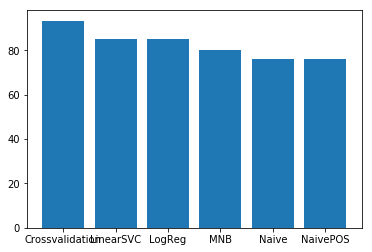

In [34]:
classifiers = ('Crossvalidation', 'Naive', 'NaivePOS', 'MNB', 'LogReg', 'LinearSVC')
accuracies = [average*100, Naive_Accuracy, NaivePos_Accuracy, MNB_Accuracy, LogReg_Accuracy, LinearSVC_Accuracy]
plt.bar(classifiers, accuracies)
plt.show()